# Classifier comparison

A comparison of several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


We choose a few classifiers, KNN, Decision Tree Classifier, Random Forest Classifier, and Neural Network MLP Classifier.

In [ ]:
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "NN default",
    "NN alpha 1.0",
    "NN alpha 0.32",
]

### Neural Networks: Effect of regularisation

For the Neural Network MLPClassifier, we choose three options.

1. We take the default MLPClassier with max iterations = 2000.

2. We then change the value of alpha, the strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss. The default value of alpha = 1e-4. Here we change alpha to 1.

3. The final case if where alpha = 0.32. We also change the default solver from 'adam' to 'lbfgs' optimiser. Early stopping is changed from the default 'False' to 'True'. The hidden layer size is also changed from the default (100,) to [20,20].

Obviously, a brute force method like this to look for optimal hyperparameters is not possible. Once can construct a pipeline or run a GridSearchCV to iterate some of these hyperparameters for the MLPClassifier.

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(random_state=1, max_iter=2000),
    MLPClassifier(alpha=1., random_state=1, max_iter=2000),
    MLPClassifier(solver="lbfgs", alpha=0.32, random_state=1, max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[20, 20])
]

We use scitkit-learn random sample generators to build a synthetic dataset of 1000 datapoints, with added Gaussian noise (standard deviation - 0.3). The make_moons dataset creates two interleaving half circles. A simple toy dataset to visualize clustering and classification algorithms. Other datasets include make_circles, make_blobs, and make_classification.

In [ ]:
datasets = [make_moons(1000, noise=0.3, random_state=42)]

### Plot input data and classifier decision boundaries
Plotting the original input dataset, with the training points in solid red and blue, and the testing points being semi-transparent. The decision boundaries for the different classifiers are shown. The lower right shows the classification accuracy on the test set.

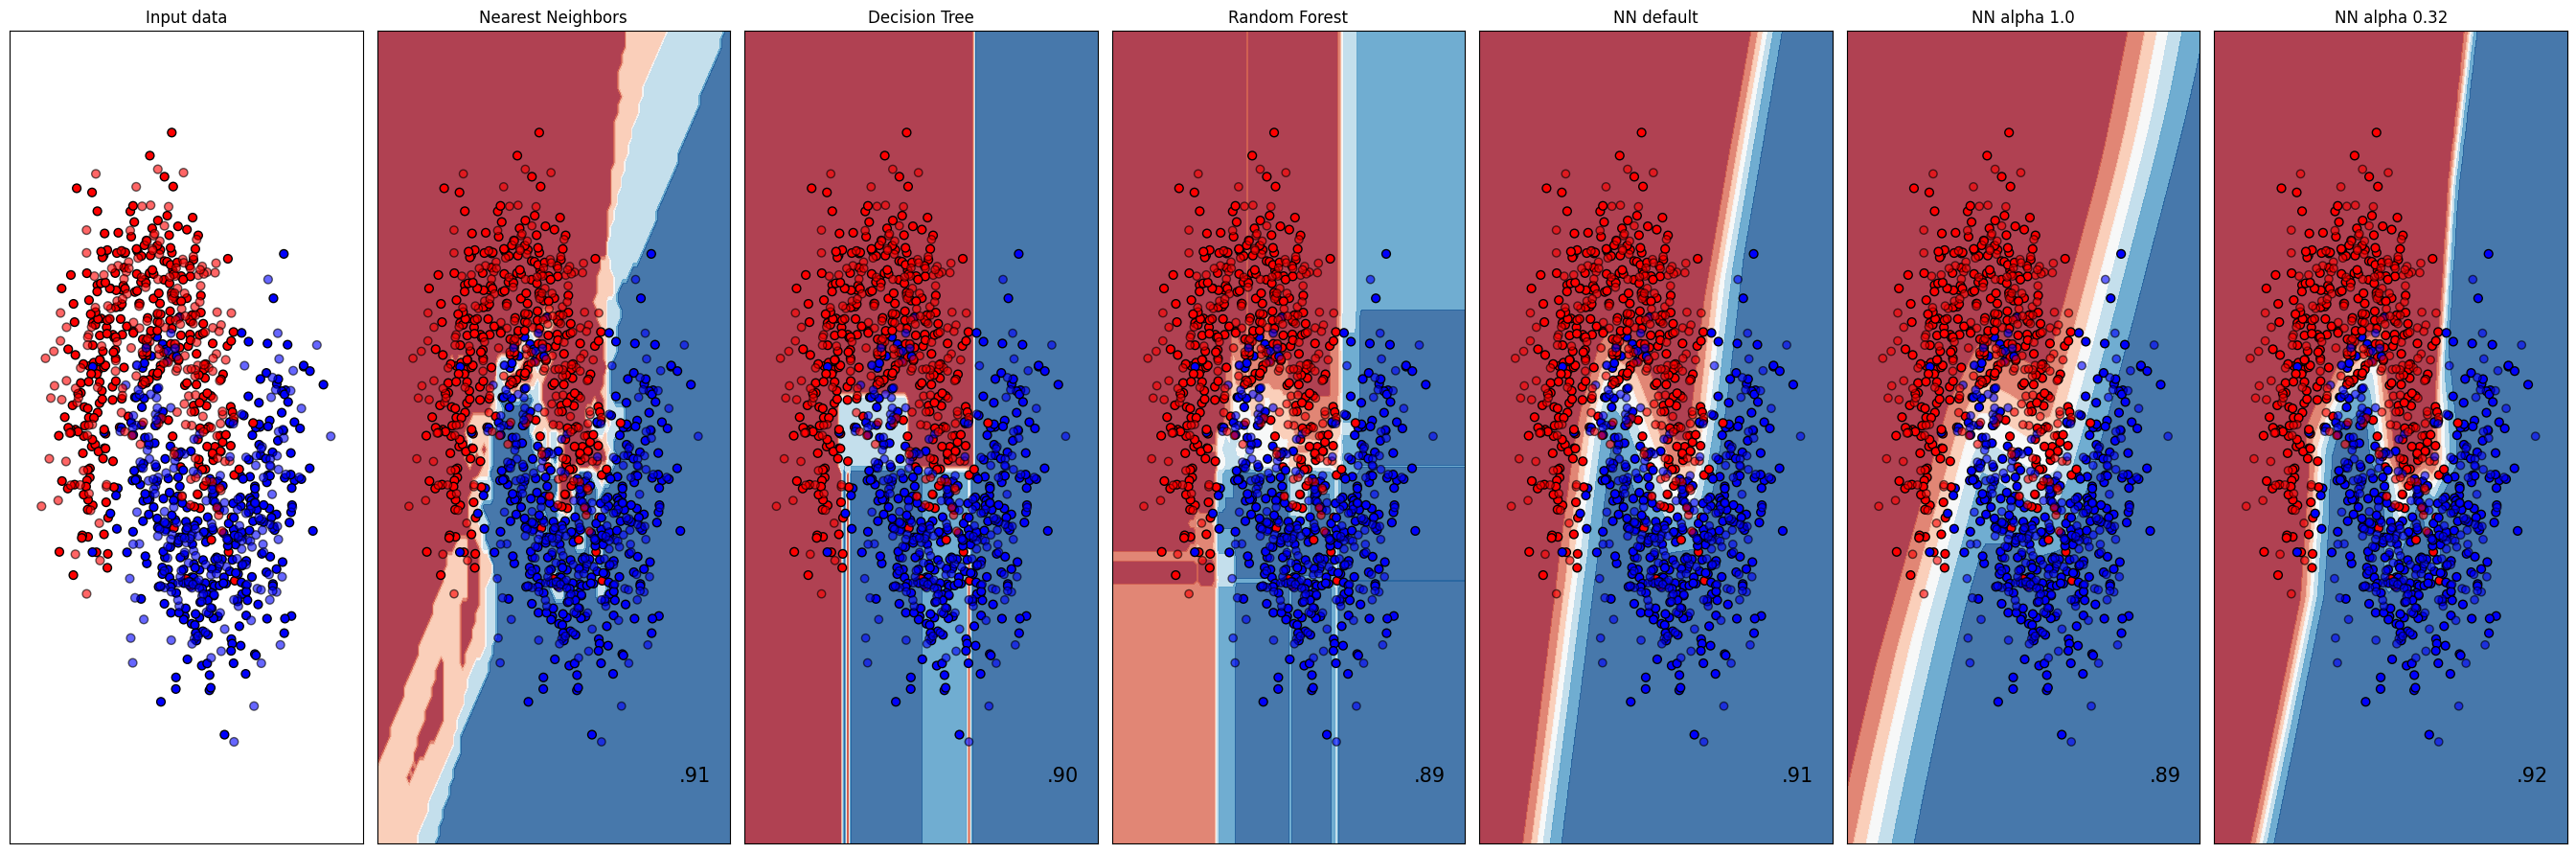

In [ ]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k",s=40)
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k",s=40
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k", s=40
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

Complex classifiers like Neural Networks make sense in high-dimensional spaces and/or complex problems.

Since the input synthetic dataset make_moons is not that complicated, data can more easily be separated using simpler classifiers and might lead to better generalisation than is achieved by other complex classifiers. We do see a better performance of a Neural Network with optimal hyperparameters.

However, this would not be true for more complex real-world datasets. Hence, the point of this exercise notebook to compare classifiers is important to identify the classifier to be used for the given problem.

-------------------------------------------------------------------------------------------------------------------------------------------

### Hidden Layers

We will look at the effect of hidden layers on neural networks. We will use a slightly more complex, randomly generated synthetic dataset.

We demonstrate neural networks using artificial color spiral data. This is a 2-D dataset where different points are colored differently, and the task is to predict the correct color based on the point location. So it is a basic decision task. However, in order to make the task reasonably complex, we introduce the colors in a spiral pattern. We create the data as follows:

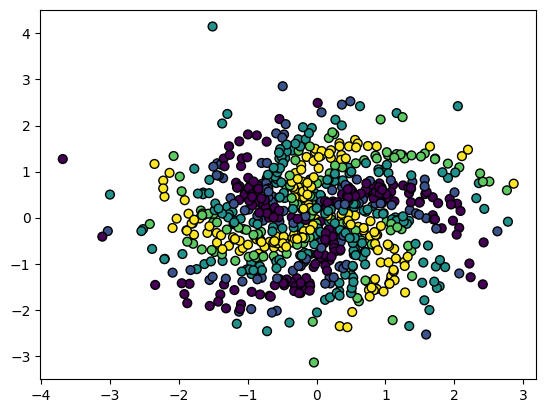

In [ ]:
import pandas as pd

n = 800  # number of data points
x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)
#Because of the randomness of the above dataset, the final accuracies of the models might differ slightly.

X = np.column_stack((x1, x2))  # design matrix
alpha = np.arctan2(x2, x1)
r = np.sqrt(x1**2 + x2**2)
c1 = np.sin(3*alpha + 2*r)
c2 = np.cos(3*alpha + 2*r)
## partition the sum of a sin and cosine into 5 intervals
category = pd.cut(c1 + c2,
           bins=[-1.5, -1.1, -0.6, 0.6, 1.1, 1.5],
           labels=[1, 2, 3, 4, 5])
y = category.astype(int)

# Plot the datapoints
plt.scatter(X[:,0], X[:,1], c=y, s=40, edgecolors='black')

We define a function to plot decision boundaries.

In [ ]:
def DBPlot(m, X, y, nGrid = 100):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    hatyy = m.predict(XX).reshape(xx1.shape)
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

We will use

1. K-nearest neighbours
2. An MLP with a single hidden layer of 20 nodes i.e. hidden_layer_sizes=(20,)
3. An MLP with three hidden layers with 256, 128, and 64 nodes respectively i.e. hidden_layer_sizes = (256, 128, 64)

In [ ]:
names = [
    "Nearest Neighbors",
    "MLP with 1 hidden layer of 20 nodes",
    "MLP with 3 hidden layers with 256, 128, and 64 nodes",
]

classifiers = [
    KNeighborsClassifier(3),
    MLPClassifier(hidden_layer_sizes = (20,), max_iter=10000,random_state=42),
    MLPClassifier(hidden_layer_sizes = (256, 128, 64), max_iter=10000,random_state=42)
]

Nearest Neighbors
Accuracy:  0.8825


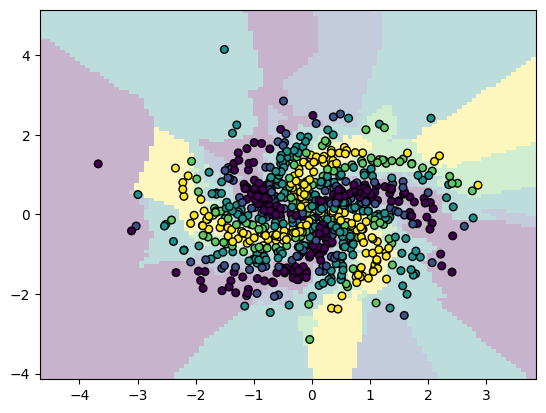

MLP with 1 hidden layer of 20 nodes
Accuracy:  0.56125


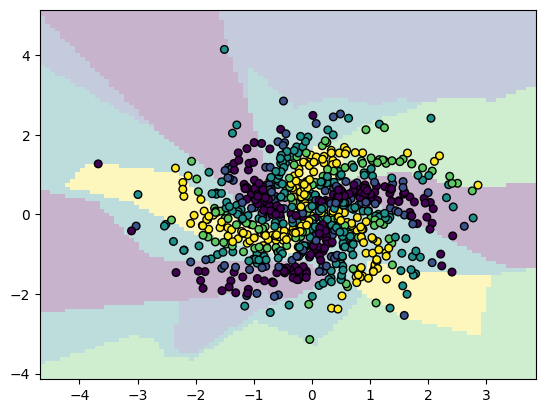

MLP with 3 hidden layers with 256, 128, and 64 nodes
Accuracy:  0.985


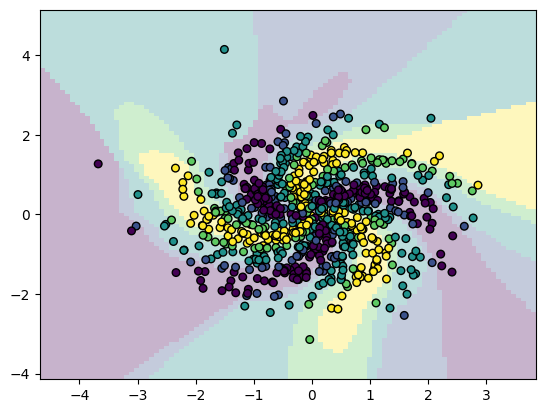

In [ ]:
from sklearn.metrics import accuracy_score

for name, clf in zip(names, classifiers):
    clf.fit(X,y)
    yhat = clf.predict(X)
    #print(confusion_matrix(y, yhat))
    print(name)
    print('Accuracy: ',accuracy_score(y, yhat))
    DBPlot(clf, X, y)

We see that the KNN model has an accuracy of ~90%. For a straightforward dataset, simpler algortihm perform reasonably.

The MLP with a single hidden layer with 20 nodes has a very low accuracy of 50-60%. We can see that the model correctly captures the trend of the data i.e. the spirals of different colors, but the shape of spirals is not accurate enough.

The MLP with three hidden layers with 256, 128, and 64 nodes, has an improved accuracy of ~98%. The visual inspection from the decision boundary plot also confirms that the more powerful neural network is quite good in capturing the overall model structure.